## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

Note:

In our project there is no specific way of loading our data as it is all images and the way we are training our data is creating annotations in it by using labelling tools like LabelImg. In the cell below we are loading a few images from our dataset and then further we will display how exactly do we prepare our data for the model training that is about to happen.

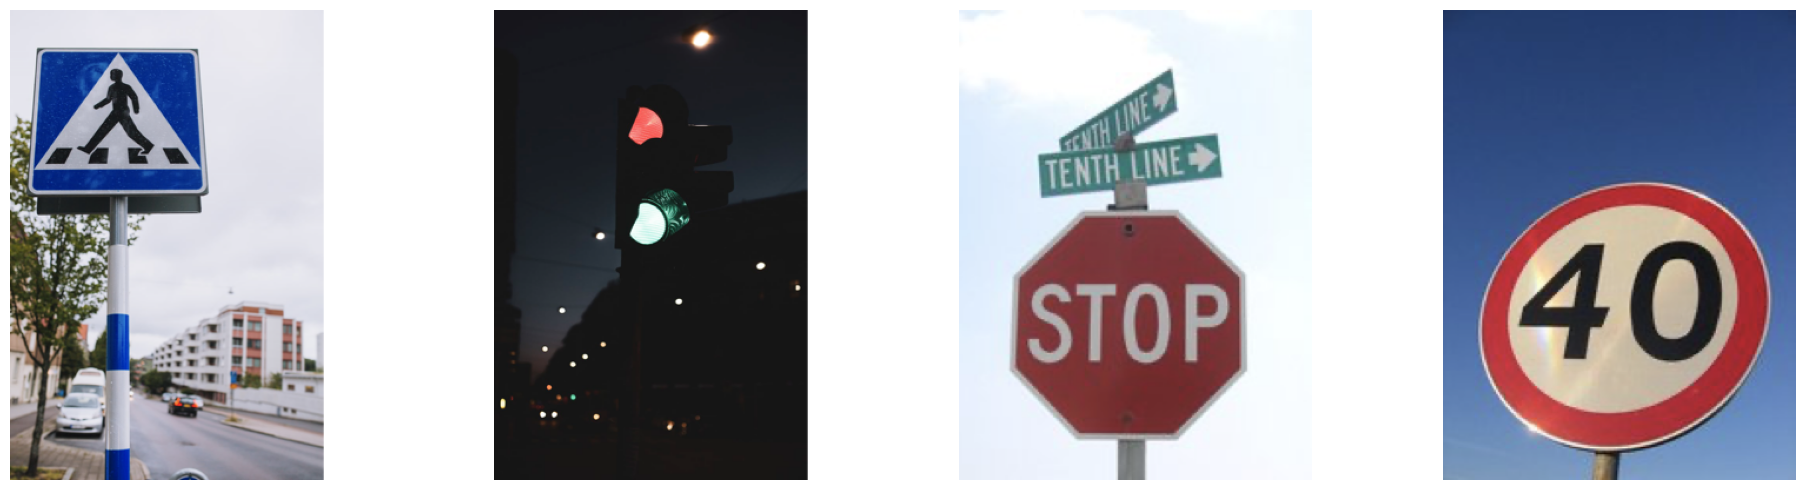

In [3]:
### YOUR CODE HERE
import os
from matplotlib import pyplot as plt
from PIL import Image

directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/sample_data'  

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off') 

plt.tight_layout()
plt.show()


# Annotating our Images

We added this step to the last update as well. We are adding it in this update too so that the instructors have an idea of how exactly is our data going into the model for training.

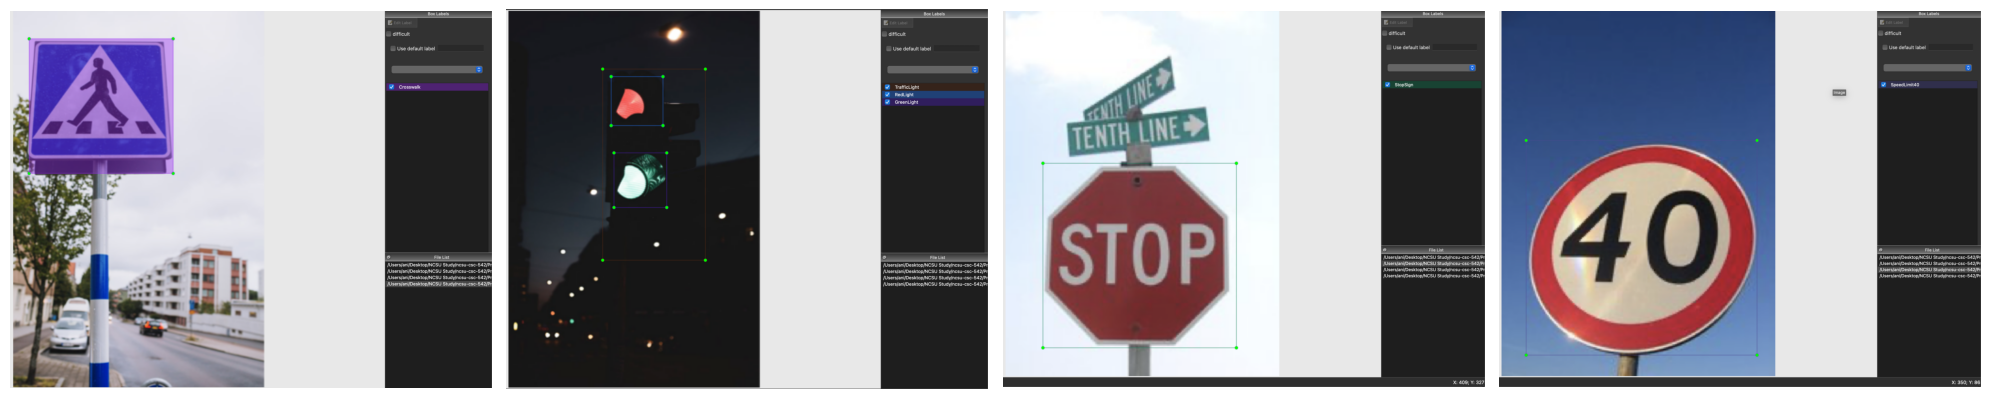

In [4]:
### YOUR CODE HERE
directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/annotated_images'  # Replace with your directory path

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


In each of the images above, the region of interest or the CLASSES are annotated within the image. The classes defined are as follows:

In [5]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/sample_data_annotated/classes.txt'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

TrafficLight
RedLight
GreenLight
StopSign
SpeedLimit10
SpeedLimit20
SpeedLimit30
SpeedLimit40
SpeedLimit50
SpeedLimit60
SpeedLimit70
SpeedLimit80
SpeedLimit90
SpeedLimit100
Crosswalk



## a. Steps in training the model 

We are using the YOLOv3 algorithm in the Darknet Framework to train our model. To prepare training for the model we need to keep a few things ready at hand to ensure that the model has everything it needs to train on.

The requirements are as follows:

We are building our model on top of the Darknet Framework. The darknet framework itself comes in with multiple classes, however we plan to build the model from scratch and hence we will be overriding the data in the model and train it so that it fits our data.

### Installing Darknet

``` git clone https://github.com/pjreddie/darknet ```

``` cd darknet ```

``` make ```

### Downloading base weights. Our model will overwrite this model. This one is just to begin training.

``` wget https://pjreddie.com/media/files/yolov3.weights ```

## b. How we're setting everything up?

This is how our directory currently looks like:
- dataset
    - (0) Stop Sign
        - Imagees containing the STOP SIGN
        - .txt files containing annotations for all the image files
    - (10) Speed Limit 10
    - (20) Speed Limit 20
    - ...
    - ..
    - .
- object.names (File containing all the classes to be trained inside our model)
- train.txt (File containing absolute paths to .txt files for the training data)
- test.txt (File containing absolute paths to .txt files for the testing data)
- trainer.data (File containing paths to the training, testing and the weights files)
- Weights File 
- Configuration File (The configuration file for training our model)
- Code File (File to test our model)

In the next steps we will show the contents of each file/directory in our project to display what exactly is being used in training the model.

### How does the .txt annotation file for an image look like?

#### Region of Interest values, highlighting the presence of classes in our dataset. 

These annotations are stored in the form of .txt files which ar further read during training.

#### Format of these Files

object-class, x-center, y-center, width, height (Essentially these coordinates form a bounded box around the region of interest in the image given)



In [6]:
import os

directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/sample_data_annotated'  

text_files = [f for f in os.listdir(directory_path) if f.endswith('.txt') and f != 'classes.txt']

for text_file in text_files:
    file_path = os.path.join(directory_path, text_file)
    
    with open(file_path, 'r') as file:
        content = file.read()
    
    print(f"{text_file}\n{content}")


image4.txt
5 0.346442 0.251250 0.573034 0.357500

image1.txt
0 0.574906 0.406250 0.408240 0.507500
1 0.507491 0.237500 0.205993 0.130000
2 0.520599 0.447500 0.209738 0.145000

image3.txt
4 0.511667 0.648750 0.843333 0.587500

image2.txt
3 0.490000 0.670000 0.706667 0.505000



### How does the object.names file look like?

In [9]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/object.names'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

0
10
20
30
40
50
60
70
80
90
100
TrafficLight
RedLight
GreenLight
Crosswalk


### How does the train.txt file look like?

In [11]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/train.txt'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_1.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_2.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_3.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_4.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_5.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_6.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/10/10_1.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/10/10_2.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/10/10_3.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/10/10_4.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/10/10_5.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/P

### How does the test.txt file look like?

In [12]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/test.txt'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/0/0_7.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/10/10_6.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/20/20_6.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/30/30_2.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/40/40_2.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/50/50_3.png
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/60/60_5.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/70/70_2.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/70/70_3.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/80/80_4.jpeg
/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/dataset/80/80_6.jpeg
/Users/ani/Desktop/NCSU St

### How does the trainer.data file look like?

In [14]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/trainer.data'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

classes=15
train=./csc542/train.txt
valid=./csc542/test.txt
names=./csc542/object.names
backup=./csc542/



### How does the configuration file look like?

In [15]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/yolot.cfg'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

[net]
# Testing
batch=64
subdivisions=64
# Training
#batch=32
#subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convol

### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

How do we train our model?

We have used no code to train it. We run the detector to train over all the files we mentioned above from the terminal using the following command

``` ./darknet detector train csc542/trainer.data csc542/yolot.cfg yolot.backup  ```

yolot.backup is the file that we have currently trained. We can continue training from where we left off when we use the .backup file to train our model.

The code below imports all the files we have defined while training the model and imports them to predict on our testing data. Since this is only the baseline model our predictions may vary. That is our model currently works well for some classes but fails to deliver in some classes. We hope to train our model further and reduce the loss using hyper-parameter tuning in the configuration file.

In [5]:
### YOUR CODE HERE

import cv2 as cv
import argparse
import sys
import numpy as np
import os.path
import collections.abc

classesFile = "/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/object.names";

classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

# Give the configuration and weight files for the model and load the network using them.

modelConfiguration = "/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/yolot.cfg";
modelWeights = "/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/yolot.backup";

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)


### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In the cell below, we have written the code to use our model to test on our data. We have presented the reults we currently have. Since the code uses arguments as inputs we weren't able to run the code in the cells itself. However we have run the code using a terminal command.

The following is our code file:

In [8]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/object_detection_yolo.py'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

# This code is written at BigVision LLC. It is based on the OpenCV project. It is subject to the license terms in the LICENSE file found in this distribution and at http://opencv.org/license.html

# Usage example:  python3 object_detection_yolo.py --video=run.mp4
#                 python3 object_detection_yolo.py --image=bird.jpg

import cv2 as cv
import argparse
import sys
import numpy as np
import os.path
import collections.abc


# Initialize the parameters
confThreshold = 0.1	  #Confidence threshold
nmsThreshold = 0.001 #Non-maximum suppression threshold

inpWidth = 416  #608     #Width of network's input image
inpHeight = 416 #608     #Height of network's input image

parser = argparse.ArgumentParser(description='Object Detection using YOLO in OPENCV')
parser.add_argument('--image', help='Path to image file.', default='40_3.png')
parser.add_argument('--video', help='Path to video file.')
args = parser.parse_args()
        
# Load names of classes
cl

### Running our code file with image inputs on TRAINING DATA

The following cell presents the inputs we are testing 

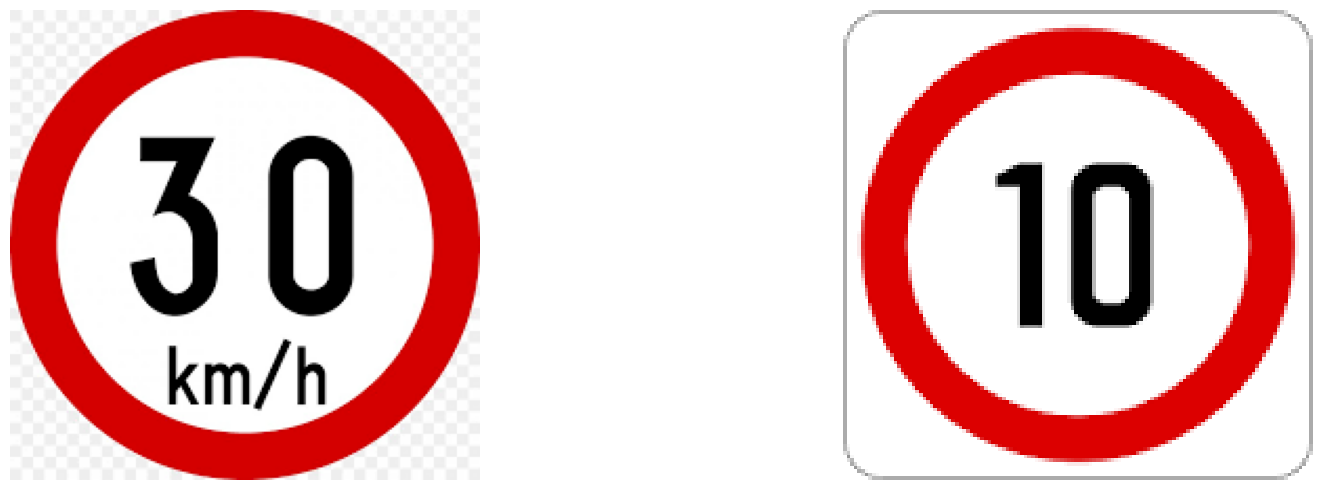

In [49]:
### YOUR CODE HERE
directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/train_inputs'  # Replace with your directory path

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


In [50]:
# RUNNING OUR CODE ON THE FIRST IMAGE

import os
# os.system('cd darknet/csc542/')
os.system('python3 darknet/csc542/object_detection_yolo.py')

Class: 30, Confidence: 1.00


0

The class 30 (Speed Limit 30) is detected by our model in the image with a confidence level of 100%

In [51]:
# RUNNING OUR CODE ON THE SECOND IMAGE

import os
# os.system('cd darknet/csc542/')
os.system('python3 darknet/csc542/object_detection_yolo.py')

Class: 10, Confidence: 1.00


0

The class 10 (Speed Limit 10) is detected by our model in the image with a confidence level of 100%

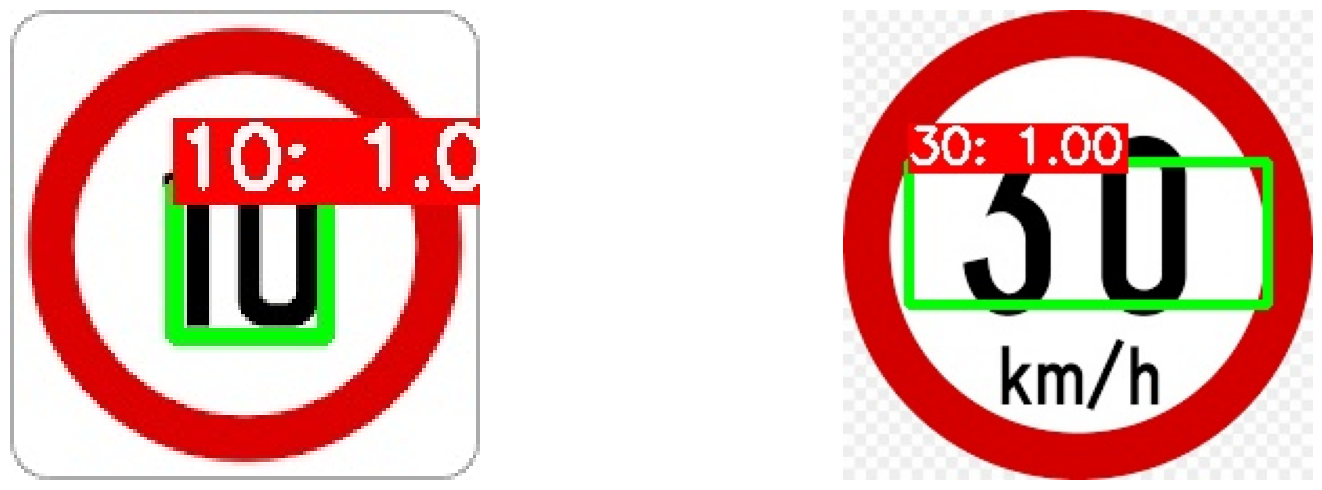

In [52]:
### YOUR CODE HERE
directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/train_outputs'  # Replace with your directory path

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


## Thus the performance on the TRAINING DATA is as expected for the current model

### Running our code file with image inputs on TEST DATA

The following cell presents the inputs we are testing 

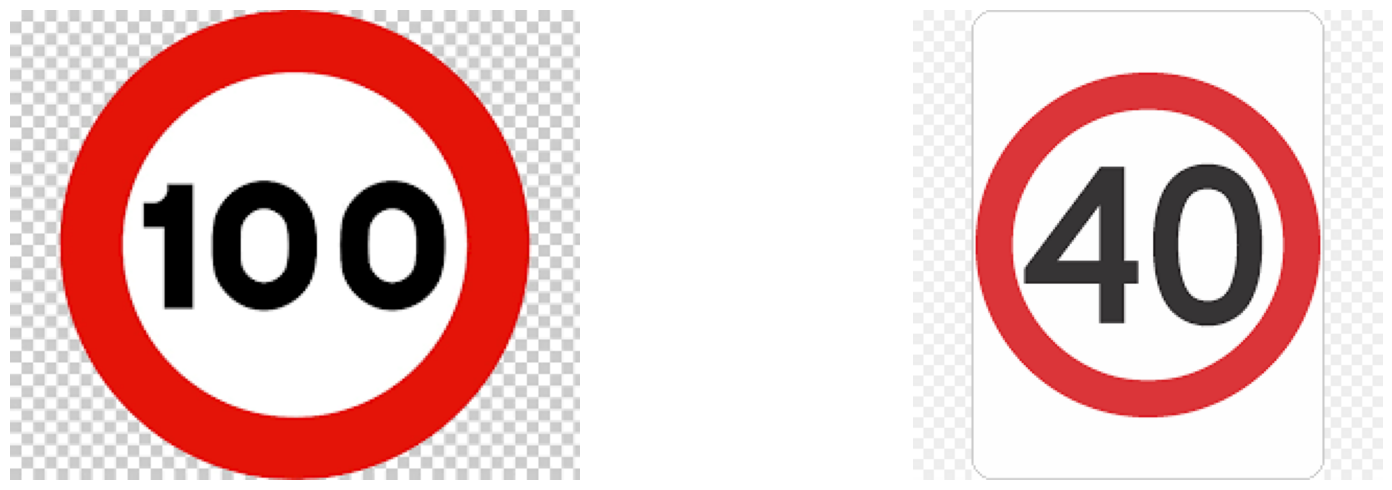

In [38]:
### YOUR CODE HERE
directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/test_inputs'  # Replace with your directory path

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


In [35]:
# RUNNING OUR CODE ON THE FIRST IMAGE

import os
# os.system('cd darknet/csc542/')
os.system('python3 darknet/csc542/object_detection_yolo.py')

Class: 100, Confidence: 0.92


0

The class 100 (Speed Limit 100) is detected by our model in the image with a confidence level of 92%

In [37]:
# RUNNING OUR CODE ON THE SECOND IMAGE

import os
# os.system('cd darknet/csc542/')
os.system('python3 darknet/csc542/object_detection_yolo.py')

0

The class 40 (Speed Limit 40) is NOT detected by our model suggesting that the model is currently not performing well for the current amount of training it has received. Hopefully with more training our model will predict values much better.

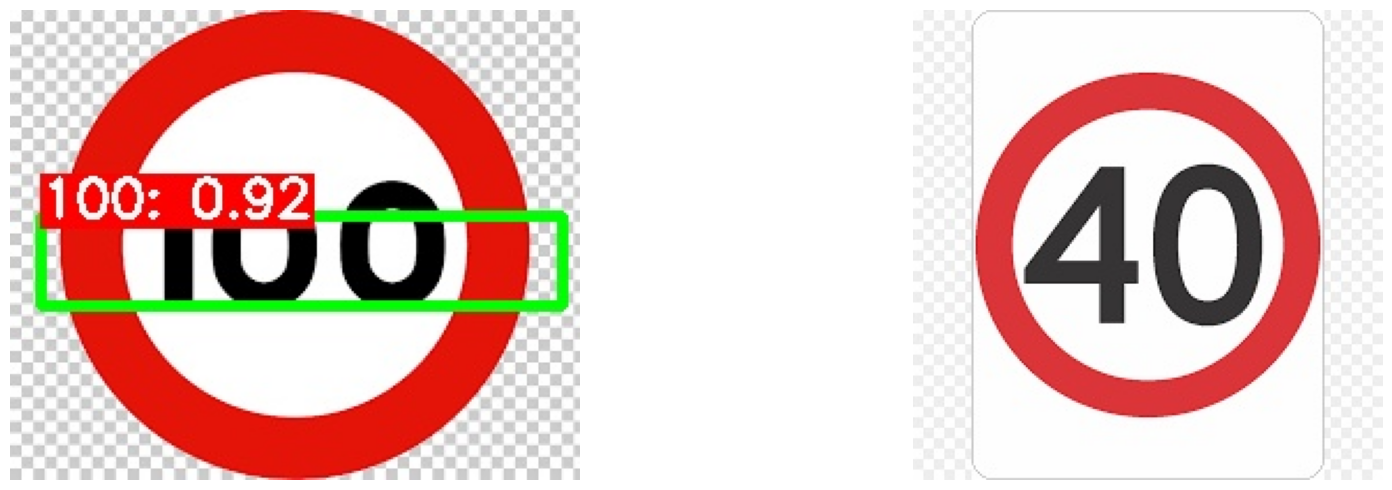

In [39]:
### YOUR CODE HERE
directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/darknet/csc542/test_outputs'  # Replace with your directory path

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


## Thus the performance on the TEST DATA is good for some classes but it is failing for some classes.

# How can this be fixed?

We believe training our model further while improving training parameters could help bridge the gap between the current outputs and the accurate outputs. We hope to achieve this in the next steps of our project.